

## 의사결정나무 (분류)
     

### 개념  
__가. 성장단계__  
- 각 마디에서 __적절한 최적의 분리규칙(splitting rule)__ 을 찾아서 나무를 성장시키는 과정으로 적절한 __정지규칙(stopping rule)__ d을 만족하면 중단한다
- 분리규칙을 설정하는 분리기준(splitting criterion)은 이산형 목표변수, 연속형 목표변수에 따라 다르다
- 범주형 목표변수   
    
|기준값 |분리기준|  |
|------|---|---|
|지니지수|지니지수를 감소시커주는 예측변수와 그 때의 최적 분리에 의해서 자식마디를 형성|  |
|엔트로피지수|엔트로피 지수가 가장 작은 예측변수와 이 때의 최적 분리에 의해 자식마디를 형성| 

__나. 가지치기 단계__   
- 나무의 크기를 모형의 복잡도로 볼 수 있음
- 과적합 방지를 위함


* <b>max_depth:int, default=None
    - 트리의 최대 깊이
* <b>min_samples_split:int or float, default=2
    - 내부 노드를 분할하는 데 필요한 최소 샘플 수
* <b>min_samples_leaf:int or float, default=1
    - 리프노드에 있어야 하는 최소 샘플 수</b>
        <br><br>
       
* criterion:{“gini”, “entropy”}, default=”gini”   
    - 분할할 때 사용할 함수

* splitter:{“best”, “random”}, default=”best”
    - 분할방법
        - best: 분할 시가장 좋은 노드 선택
        - random: 임의적으로 노드 선택

* random_state
    - 추정량의 임의성을 제어함
    
* ccp_alphanon-negative: float, default=0.0
    - pruning에 사용하는 파라미터
    - 최소비용-복잡성 정리에 사용되는 복잡성 매개변수
    - ccp_alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
    - default로 할 경우 pruning은 수행되지 않음

예시
> sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1,
                                    max_features=None, random_state=None, ccp_alpha=0.0)

__[예제 1.]__   
credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을분류하는 의사결정나무 모델 만들어라

In [1]:
import pandas as pd
import numpy as np

# 데이터 업로드
credit = pd.read_csv('../data/credit_final.csv')
credit 


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
# 설명변수(X), 종속변수(y) 분리
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   account.balance                 1000 non-null   int64
 1   credit.duration.months          1000 non-null   int64
 2   previous.credit.payment.status  1000 non-null   int64
 3   credit.purpose                  1000 non-null   int64
 4   credit.amount                   1000 non-null   int64
 5   savings                         1000 non-null   int64
 6   employment.duration             1000 non-null   int64
 7   installment.rate                1000 non-null   int64
 8   marital.status                  1000 non-null   int64
 9   guarantor                       1000 non-null   int64
 10  residence.duration              1000 non-null   int64
 11  current.assets                  1000 non-null   int64
 12  age                             1000 non-null   int64
 13  othe

In [4]:
from sklearn.model_selection import train_test_split

# 훈련셋, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [5]:

from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()

## 모델 학습 
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
## 학습용 데이터에 대한 정확도 
dt_clf.score(X_train,y_train)

1.0

In [7]:
## 테스트 데이터에 대한 정확도 
dt_clf.score(X_test,y_test)

0.6833333333333333

In [8]:
## 예측 
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1], d

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, precision_score, f1_score, recall_score

confusion_matrix(y_test,dt_prediction)


array([[ 45,  45],
       [ 50, 160]], dtype=int64)

In [15]:
print(precision_score(y_test,dt_prediction))
print(recall_score(y_test,dt_prediction))
print(f1_score(y_test,dt_prediction))

0.7804878048780488
0.7619047619047619
0.7710843373493976


In [13]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49        90
           1       0.78      0.76      0.77       210

    accuracy                           0.68       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.68      0.69       300



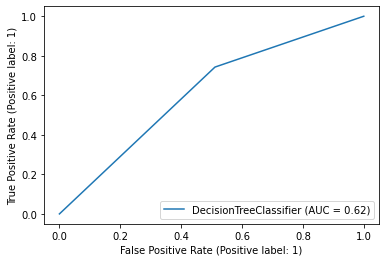

In [16]:
plot_roc_curve(dt_clf, X_test,y_test)

In [17]:
## ROC_AUC_SCORE
roc_auc_score(y_test,dt_clf.predict_proba(X_test)[:,1])

0.6309523809523809

### 가지치기

#### 주요 매개변수 조정 

In [18]:
dt_clf.get_depth()

16

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(2,16,1) , 'min_samples_leaf':range(1,20,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
model_grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 20)})

In [20]:
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [21]:
model_grid_tree.best_score_

0.7514285714285714

In [22]:
model_grid_tree.score(X_test,y_test)

0.7066666666666667

In [23]:
y_pred = model_grid_tree.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 31,  59],
       [ 29, 181]], dtype=int64)

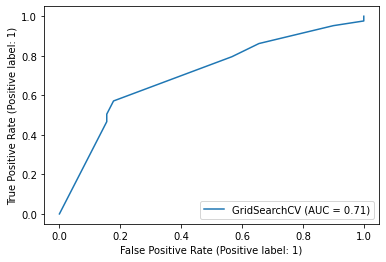

In [25]:
plot_roc_curve(model_grid_tree, X_test,y_test)

In [26]:
roc_auc_score(y_test,model_grid_tree.predict_proba(X_test)[:,1])

0.7058201058201058

<b> 결과 해석 
    
1) 과적합을 막고, 최적의 분류 모델을 찾기 위해 GridSearchCV를 사용하였다. 

2) max_depth = 3, min_samples_leaf=5 로 모델을 학습시켰다. 

3) 결과 ROC_AUC_SCORE는 0.71로 준수하다고 볼 수는 없다. 
    
4) 다른 모델을 통해 정확도를 향상시킬 방안을 찾아봐야함 

#### ccp_alpha로 수행 (참고) 

* ccp_alphanon-negative: float, default=0.0
    - pruning에 사용하는 파라미터
    - 최소비용-복잡성 정리에 사용되는 복잡성 매개변수
    - ccp_alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
    - default로 할 경우 pruning은 수행되지 않음

In [27]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00090226, 0.00091097, 0.00119048, 0.00122449,
        0.00122449, 0.00126211, 0.00126984, 0.00131868, 0.00133929,
        0.00134921, 0.00135714, 0.00136054, 0.00136364, 0.00138996,
        0.00140056, 0.0014127 , 0.0015873 , 0.00166667, 0.00166667,
        0.00175283, 0.00182963, 0.00186064, 0.00190476, 0.00190476,
        0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00202691,
        0.00205882, 0.00214286, 0.00214286, 0.00214286, 0.00214286,
        0.00214286, 0.00217687, 0.00227546, 0.00233432, 0.00241758,
        0.00244898, 0.00245238, 0.00247619, 0.0025    , 0.00258963,
        0.00259662, 0.00266973, 0.00267284, 0.0027551 , 0.0027551 ,
        0.00287415, 0.00301413, 0.00304311, 0.00338624, 0.00378711,
        0.00387636, 0.0041662 , 0.00417262, 0.00445055, 0.00511711,
        0.00606213, 0.00752796, 0.00857532, 0.01353158, 0.02487219,
        0.04253428]),
 'impurities': array([0.        , 0.00270677, 0.00543969, 0.00782064, 0.01026962

In [28]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

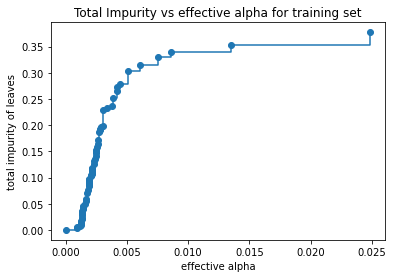

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [30]:
dt_clf_pr = DecisionTreeClassifier(ccp_alpha=0.0055)
dt_clf_pr = dt_clf_pr.fit(X_train, y_train)
dt_prediction_pr = dt_clf_pr.predict(X_test)

In [31]:
confusion_matrix(y_test, dt_prediction_pr)

array([[ 29,  61],
       [ 25, 185]], dtype=int64)

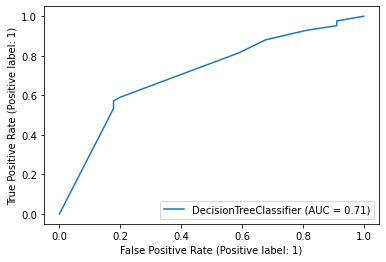

In [32]:
plot_roc_curve(dt_clf_pr,X_test,y_test)

In [33]:
roc_auc_score(y_test,dt_clf_pr.predict_proba(X_test)[:,1])

0.7113227513227512